## Setup

In [2471]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# For nice plotting styles
sns.set_theme(style="whitegrid")

## Load Data

In [2472]:
med_price_df = pd.read_csv('/Users/goffy/Desktop/QM/Individual Research/Dataset/Median_Price_UK.csv')

print("Median Price DataFrame shape:", med_price_df.shape)
print(med_price_df)

Median Price DataFrame shape: (8053, 114)
     Local authority code Local authority name  Ward code  \
0               E06000001           Hartlepool  E05008945   
1               E06000001           Hartlepool  E05008946   
2               E06000001           Hartlepool  E05008947   
3               E06000001           Hartlepool  E05008943   
4               E06000001           Hartlepool  E05008944   
...                   ...                  ...        ...   
8048            W06000024       Merthyr Tydfil  W05000895   
8049            W06000024       Merthyr Tydfil  W05000707   
8050            W06000024       Merthyr Tydfil  W05000708   
8051            W06000024       Merthyr Tydfil  W05000710   
8052            W06000024       Merthyr Tydfil  W05000711   

                 Ward name Year ending Dec 1995 Year ending Mar 1996  \
0              Foggy Furze               39,000               39,000   
1                     Hart               56,500               56,500   
2     Hea

In [2473]:
incidents_df = pd.read_csv('/Users/goffy/Desktop/QM/Individual Research/Dataset/LFB Incident data from 2018  - November 2024.csv')

print("Incidents DataFrame shape:", incidents_df.shape)
print(incidents_df.head())

Incidents DataFrame shape: (794155, 39)
    IncidentNumber DateOfCall  CalYear TimeOfCall  HourOfCall  \
0  000008-01012018  01-Jan-18     2018   00:04:25           0   
1  000009-01012018  01-Jan-18     2018   00:04:30           0   
2  000010-01012018  01-Jan-18     2018   00:04:34           0   
3  000011-01012018  01-Jan-18     2018   00:04:58           0   
4  000014-01012018  01-Jan-18     2018   00:07:47           0   

     IncidentGroup StopCodeDescription SpecialServiceType   PropertyCategory  \
0      False Alarm                 AFA                NaN    Non Residential   
1      False Alarm                 AFA                NaN    Non Residential   
2             Fire      Secondary Fire                NaN  Outdoor Structure   
3  Special Service     Special Service                RTC       Road Vehicle   
4             Fire        Primary Fire                NaN       Road Vehicle   

                       PropertyType  ... FirstPumpArriving_AttendanceTime  \
0          

In [2474]:
# PROPERTY DATA: rename "Ward code" to "WardCode"
med_price_df.rename(columns={"Ward code": "WardCode"}, inplace=True)

# INCIDENTS DATA: rename "IncGeo_WardCode" to "WardCode"
incidents_df.rename(columns={"IncGeo_WardCode": "WardCode"}, inplace=True)

## Inspect Data

In [2475]:
# Filter the building_incidents_df to only include incidents from 2018 to 2023
incidents_df = incidents_df[(incidents_df['CalYear'] >= 2018) & (incidents_df['CalYear'] <= 2023)]

print("Filtered Building Related Incidents DataFrame shape:", incidents_df.shape)
print(incidents_df.tail())

Filtered Building Related Incidents DataFrame shape: (670993, 39)
         IncidentNumber DateOfCall  CalYear TimeOfCall  HourOfCall  \
670988  206052-31122023  31-Dec-23     2023   23:48:33          23   
670989  206053-31122023  31-Dec-23     2023   23:50:05          23   
670990  206057-31122023  31-Dec-23     2023   23:56:30          23   
670991  206059-31122023  31-Dec-23     2023   23:59:08          23   
670992  206060-31122023  31-Dec-23     2023   23:59:24          23   

          IncidentGroup        StopCodeDescription SpecialServiceType  \
670988      False Alarm    False alarm - Malicious                NaN   
670989      False Alarm    False alarm - Malicious                NaN   
670990  Special Service            Special Service   Medical Incident   
670991             Fire             Secondary Fire                NaN   
670992      False Alarm  False alarm - Good intent                NaN   

       PropertyCategory                                       PropertyType

In [2476]:
# Group by PropertyCategory and count the number of incidents for each category
property_category_group = incidents_df.groupby('PropertyCategory').size().reset_index(name='Count')

print(property_category_group)

    PropertyCategory   Count
0           Aircraft     354
1               Boat     358
2           Dwelling  363986
3    Non Residential  141908
4  Other Residential   35174
5            Outdoor   53338
6  Outdoor Structure   30744
7       Rail Vehicle     556
8       Road Vehicle   44575


In [2477]:
building_related_categories = ['Dwelling', 'Other Residential']
building_incidents_df = incidents_df[incidents_df['PropertyCategory'].isin(building_related_categories)]

print("Building Related Incidents DataFrame shape:", building_incidents_df.shape)
print(building_incidents_df.head())

Building Related Incidents DataFrame shape: (399160, 39)
     IncidentNumber DateOfCall  CalYear TimeOfCall  HourOfCall  \
5   000016-01012018  01-Jan-18     2018   00:09:11           0   
7   000026-01012018  01-Jan-18     2018   00:13:57           0   
8   000027-01012018  01-Jan-18     2018   00:15:21           0   
9   000028-01012018  01-Jan-18     2018   00:15:32           0   
12  000035-01012018  01-Jan-18     2018   00:20:22           0   

      IncidentGroup StopCodeDescription               SpecialServiceType  \
5   Special Service     Special Service                     Lift Release   
7   Special Service     Special Service  Other rescue/release of persons   
8   Special Service     Special Service             Effecting entry/exit   
9   Special Service     Special Service                     Lift Release   
12  Special Service     Special Service                         Flooding   

   PropertyCategory                                       PropertyType  ...  \
5         

In [2478]:
incident_group_counts = building_incidents_df.groupby('IncidentGroup').size().reset_index(name='Count')
print(incident_group_counts)

     IncidentGroup   Count
0      False Alarm  200633
1             Fire   32133
2  Special Service  166394


In [2479]:
fire_incidents_df = building_incidents_df[incidents_df['IncidentGroup'] == 'Fire']

print("Fire Incidents DataFrame shape:", fire_incidents_df.shape)
print(fire_incidents_df.tail())

Fire Incidents DataFrame shape: (32133, 39)
         IncidentNumber DateOfCall  CalYear TimeOfCall  HourOfCall  \
670813  205770-31122023  31-Dec-23     2023   15:00:20          15   
670826  205796-31122023  31-Dec-23     2023   15:31:23          15   
670860  205849-31122023  31-Dec-23     2023   17:04:46          17   
670886  205887-31122023  31-Dec-23     2023   18:16:55          18   
670887  205892-31122023  31-Dec-23     2023   18:24:01          18   

       IncidentGroup StopCodeDescription SpecialServiceType PropertyCategory  \
670813          Fire        Primary Fire                NaN         Dwelling   
670826          Fire        Primary Fire                NaN         Dwelling   
670860          Fire        Primary Fire                NaN         Dwelling   
670886          Fire        Primary Fire                NaN         Dwelling   
670887          Fire        Primary Fire                NaN         Dwelling   

                                             PropertyT

/var/folders/wb/gskmj0qx18q4nbm5tq4v7hlc0000gn/T/ipykernel_72493/1502420113.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  fire_incidents_df = building_incidents_df[incidents_df['IncidentGroup'] == 'Fire']


In [2480]:
# Group by WardCode and count the number of incidents for each ward
ward_incident_counts = fire_incidents_df.groupby('WardCode').size().reset_index(name='Count')

print(list(ward_incident_counts['WardCode']))

# Ensure WardCode values are strings and match the format in the shapefile
ward_incident_counts['WardCode'] = ward_incident_counts['WardCode'].astype(str)

['E05000380', 'E05009288', 'E05009291', 'E05009292', 'E05009294', 'E05009297', 'E05009299', 'E05009300', 'E05009301', 'E05009302', 'E05009303', 'E05009304', 'E05009305', 'E05009306', 'E05009308', 'E05009309', 'E05009310', 'E05009311', 'E05009312', 'E05009317', 'E05009318', 'E05009319', 'E05009320', 'E05009321', 'E05009322', 'E05009323', 'E05009324', 'E05009325', 'E05009326', 'E05009327', 'E05009328', 'E05009329', 'E05009330', 'E05009331', 'E05009332', 'E05009333', 'E05009334', 'E05009335', 'E05009336', 'E05009367', 'E05009368', 'E05009369', 'E05009370', 'E05009371', 'E05009372', 'E05009373', 'E05009374', 'E05009375', 'E05009376', 'E05009377', 'E05009378', 'E05009379', 'E05009380', 'E05009381', 'E05009382', 'E05009383', 'E05009384', 'E05009385', 'E05009386', 'E05009387', 'E05009388', 'E05009389', 'E05009390', 'E05009391', 'E05009392', 'E05009393', 'E05009394', 'E05009395', 'E05009396', 'E05009397', 'E05009398', 'E05009399', 'E05009400', 'E05009401', 'E05009402', 'E05009403', 'E05009404'

## Convert Data

In [2481]:
# Filter the columns to only include the time from 2018-2023
columns_to_keep = ['Local authority code', 'Local authority name', 'WardCode', 'Ward name'] + \
                  [col for col in med_price_df.columns if 'Year ending' in col and '2018' <= col[-4:] <= '2023']
med_price_df = med_price_df[columns_to_keep]

print(med_price_df.head())

  Local authority code Local authority name   WardCode             Ward name  \
0            E06000001           Hartlepool  E05008945           Foggy Furze   
1            E06000001           Hartlepool  E05008946                  Hart   
2            E06000001           Hartlepool  E05008947  Headland and Harbour   
3            E06000001           Hartlepool  E05008943              De Bruce   
4            E06000001           Hartlepool  E05008944     Fens and Rossmere   

  Year ending Mar 2018 Year ending Jun 2018 Year ending Sep 2018  \
0              110,000              102,000              102,000   
1              157,000              152,725              152,000   
2               86,500               85,000               85,000   
3              126,500              127,975              124,950   
4              128,000              130,000              130,000   

  Year ending Dec 2018 Year ending Mar 2019 Year ending Jun 2019  ...  \
0               95,000               

In [2482]:
# Convert the price columns to numeric, removing any commas and replacing ':' with NaN
for col in columns_to_keep[4:]:
    med_price_df[col] = med_price_df[col].str.replace(',', '').replace(':', np.nan).astype(float)

In [2483]:
# Calculate the average price for each ward
med_price_df['Average_Price'] = med_price_df[columns_to_keep[4:]].mean(axis=1)

print(med_price_df[['WardCode', 'Average_Price']])

       WardCode  Average_Price
0     E05008945  106035.714286
1     E05008946  158772.619048
2     E05008947   94035.714286
3     E05008943  126882.142857
4     E05008944  137077.380952
...         ...            ...
8048  W05000895  142250.000000
8049  W05000707  111988.095238
8050  W05000708  157834.523810
8051  W05000710   81904.761905
8052  W05000711  117047.047619

[8053 rows x 2 columns]


## Visualization

London Wards Shapefile DataFrame shape: (657, 7)
                       NAME   GSS_CODE                               DISTRICT  \
0         Chessington South  E05000405                   Kingston upon Thames   
1    Tolworth and Hook Rise  E05000414                   Kingston upon Thames   
2                Berrylands  E05000401                   Kingston upon Thames   
3                 Alexandra  E05000400                   Kingston upon Thames   
4                  Beverley  E05000402                   Kingston upon Thames   
..                      ...        ...                                    ...   
652                 Aldgate  E05009289  City and County of the City of London   
653            Broad Street  E05009295  City and County of the City of London   
654          Coleman Street  E05009299  City and County of the City of London   
655               Portsoken  E05009308  City and County of the City of London   
656              Candlewick  E05009296  City and County of t

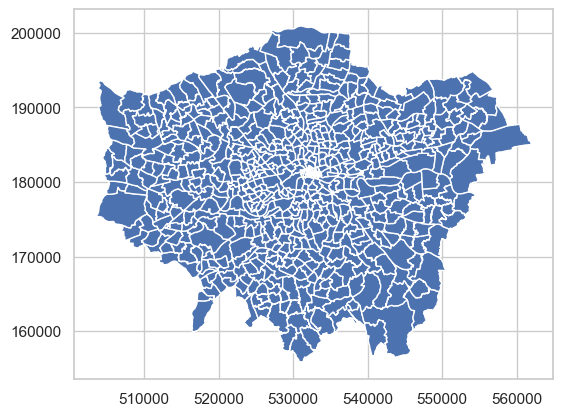

In [2484]:
import geopandas as gpd

# Load the shapefile
london_wards_shp = gpd.read_file('/Users/goffy/Desktop/London-wards-2018/London-wards-2018_ESRI/London_Ward.shp')

print("London Wards Shapefile DataFrame shape:", london_wards_shp.shape)
print(london_wards_shp)
london_wards_shp.plot()
plt.show()

In [2485]:
# Convert the shapefile coordinates to longitude and latitude (WGS84)
london_co_shp = london_wards_shp.to_crs(epsg=4326)

print(london_co_shp.head())

                     NAME   GSS_CODE              DISTRICT  LAGSSCODE  \
0       Chessington South  E05000405  Kingston upon Thames  E09000021   
1  Tolworth and Hook Rise  E05000414  Kingston upon Thames  E09000021   
2              Berrylands  E05000401  Kingston upon Thames  E09000021   
3               Alexandra  E05000400  Kingston upon Thames  E09000021   
4                Beverley  E05000402  Kingston upon Thames  E09000021   

   HECTARES  NONLD_AREA                                           geometry  
0   755.173         0.0  POLYGON ((-0.33068 51.32901, -0.33059 51.32909...  
1   259.464         0.0  POLYGON ((-0.28409 51.36515, -0.28473 51.36541...  
2   145.390         0.0  POLYGON ((-0.30385 51.39249, -0.30375 51.39252...  
3   268.506         0.0  POLYGON ((-0.27257 51.37227, -0.27263 51.37228...  
4   187.821         0.0  POLYGON ((-0.25873 51.40956, -0.25869 51.40955...  


In [2486]:
print(fire_incidents_df.columns)

Index(['IncidentNumber', 'DateOfCall', 'CalYear', 'TimeOfCall', 'HourOfCall',
       'IncidentGroup', 'StopCodeDescription', 'SpecialServiceType',
       'PropertyCategory', 'PropertyType', 'AddressQualifier', 'Postcode_full',
       'Postcode_district', 'UPRN', 'USRN', 'IncGeo_BoroughCode',
       'IncGeo_BoroughName', 'ProperCase', 'WardCode', 'IncGeo_WardName',
       'IncGeo_WardNameNew', 'Easting_m', 'Northing_m', 'Easting_rounded',
       'Northing_rounded', 'Latitude', 'Longitude', 'FRS',
       'IncidentStationGround', 'FirstPumpArriving_AttendanceTime',
       'FirstPumpArriving_DeployedFromStation',
       'SecondPumpArriving_AttendanceTime',
       'SecondPumpArriving_DeployedFromStation',
       'NumStationsWithPumpsAttending', 'NumPumpsAttending', 'PumpCount',
       'PumpMinutesRounded', 'Notional Cost (£)', 'NumCalls'],
      dtype='object')


In [2487]:
# Count the number of zero values in Longitude and Latitude
zero_longitude_count = (fire_incidents_df['Longitude'] == 0).sum()
zero_latitude_count = (fire_incidents_df['Latitude'] == 0).sum()

# Count the number of NaN values in Longitude and Latitude
na_longitude_count = fire_incidents_df['Longitude'].isna().sum()
na_latitude_count = fire_incidents_df['Latitude'].isna().sum()

print(f"Number of zero values in Longitude: {zero_longitude_count}")
print(f"Number of zero values in Latitude: {zero_latitude_count}")
print(f"Number of NaN values in Longitude: {na_longitude_count}")
print(f"Number of NaN values in Latitude: {na_latitude_count}")
print(fire_incidents_df.size)

Number of zero values in Longitude: 7
Number of zero values in Latitude: 6
Number of NaN values in Longitude: 30560
Number of NaN values in Latitude: 30560
1253187


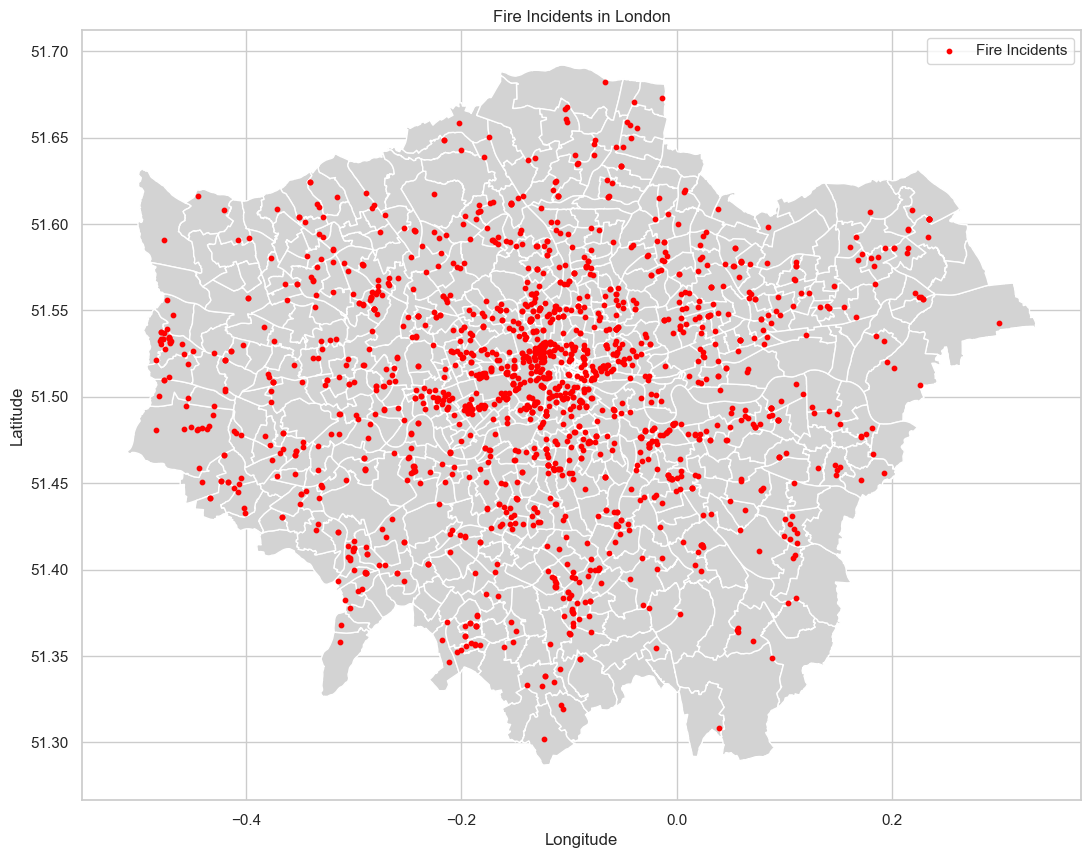

In [2488]:
# Filter out rows with 0 value in longitude and latitude
fire_incidents_df_filtered = fire_incidents_df[(fire_incidents_df['Longitude'] != 0) & (fire_incidents_df['Latitude'] != 0)]

# Plot the fire incidents on the map
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
london_co_shp.plot(ax=ax, color='lightgrey')

# Plot fire incidents
plt.scatter(fire_incidents_df_filtered['Longitude'], fire_incidents_df_filtered['Latitude'], color='red', s=10, label='Fire Incidents')

ax.set_title('Fire Incidents in London')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.show()

      WardCode  Fire_Incident_Count
0    E05000026                    1
1    E05000027                    1
2    E05000028                    1
3    E05000029                    1
4    E05000030                    2
..         ...                  ...
652  E05011485                    6
653  E05011486                    2
654  E05011487                    4
655  E05011488                    8
656  E05011489                    1

[657 rows x 2 columns]


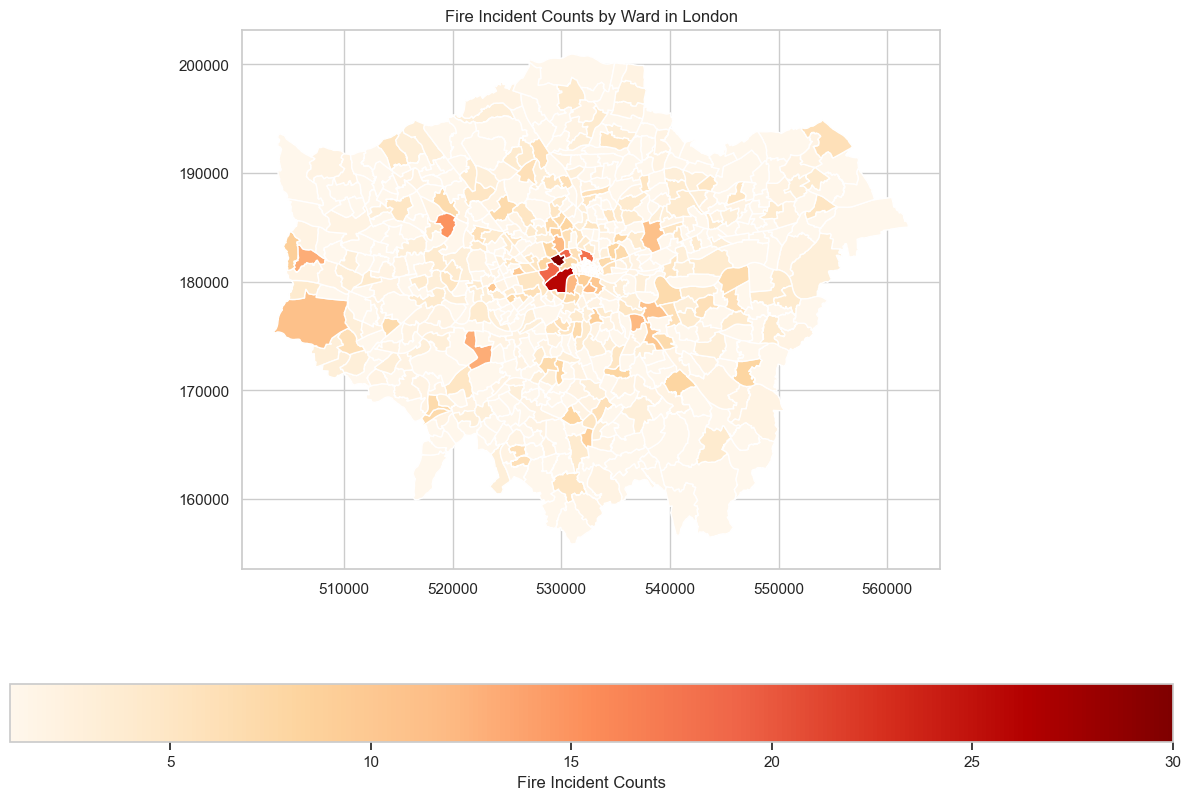

In [2489]:
# Convert fire_incidents_df_filtered to a GeoDataFrame
fire_incidents_gdf = gpd.GeoDataFrame(
    fire_incidents_df_filtered, 
    geometry=gpd.points_from_xy(fire_incidents_df_filtered.Longitude, fire_incidents_df_filtered.Latitude),
    crs="EPSG:4326"
)

# Perform a spatial join to count the number of fire incidents in each ward
fire_incidents_in_wards = gpd.sjoin(london_co_shp, fire_incidents_gdf, how="left", predicate="contains")

# Count the number of incidents in each ward
ward_fire_incident_counts = fire_incidents_in_wards.groupby('GSS_CODE').size().reset_index(name='Fire_Incident_Count')

# Rename the GSS_CODE column to WardCode
ward_fire_incident_counts.rename(columns={"GSS_CODE": "WardCode"}, inplace=True)
print(ward_fire_incident_counts)

# Merge the fire incident counts with the london_wards_shp GeoDataFrame
merged_fire_incident_df = london_wards_shp.merge(ward_fire_incident_counts, left_on='GSS_CODE', right_on='WardCode', how='left')

# Fill NaN values in Fire_Incident_Count with 0
merged_fire_incident_df['Fire_Incident_Count'] = merged_fire_incident_df['Fire_Incident_Count'].fillna(0)

# Plot the merged GeoDataFrame
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
merged_fire_incident_df.plot(column='Fire_Incident_Count', ax=ax, legend=True, cmap='OrRd', legend_kwds={'label': "Fire Incident Counts", 'orientation': "horizontal"})
ax.set_title('Fire Incident Counts by Ward in London')
plt.show()

In [2490]:
# Merge the incident counts with the london_wards_shp GeoDataFrame
merged_incident_df = london_wards_shp.merge(ward_incident_counts, left_on='GSS_CODE', right_on='WardCode', how='left')

print("Merged Incident DataFrame shape:", merged_incident_df.shape)
merged_incident_df['Count'] = merged_incident_df['Count'].fillna(0)

# Rename the 'Count' column to 'Fire_Incident_Count'
merged_incident_df.rename(columns={'Count': 'Fire_Incident_Count'}, inplace=True)
print(merged_incident_df.columns)

Merged Incident DataFrame shape: (657, 9)
Index(['NAME', 'GSS_CODE', 'DISTRICT', 'LAGSSCODE', 'HECTARES', 'NONLD_AREA',
       'geometry', 'WardCode', 'Fire_Incident_Count'],
      dtype='object')


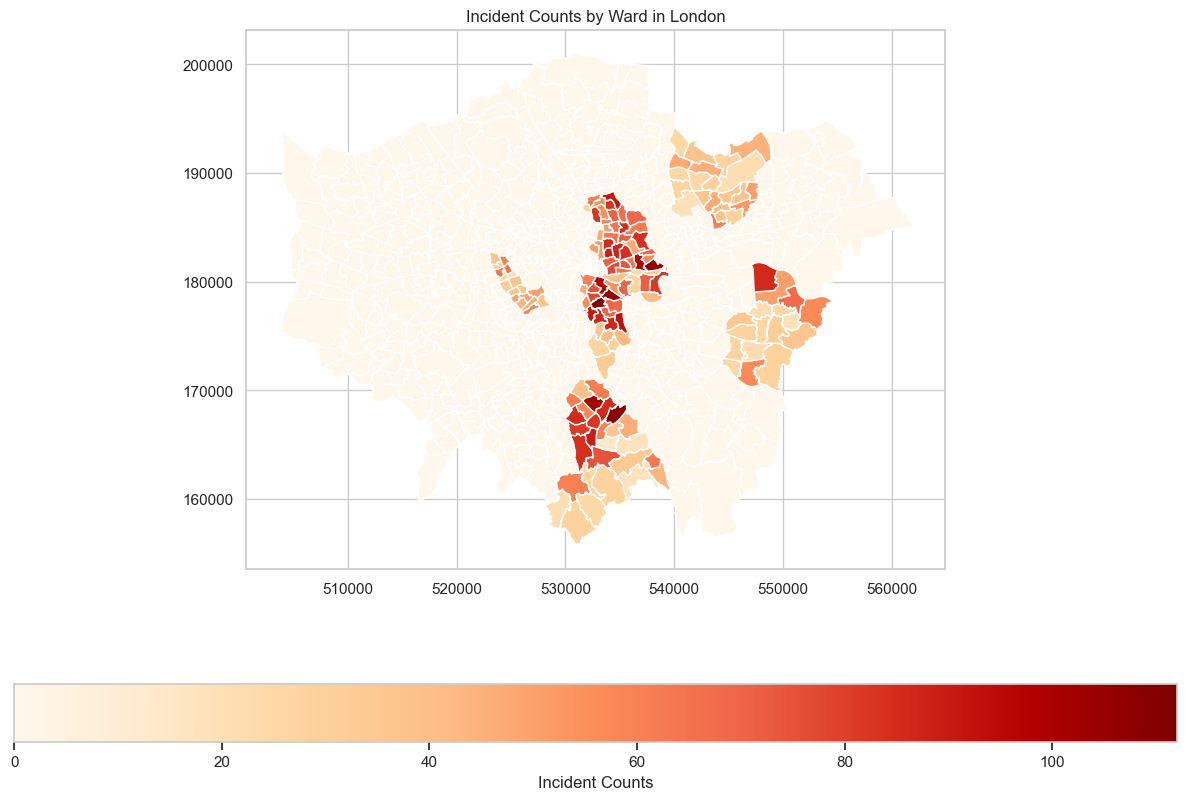

In [2491]:
# Plot the merged_incident_df GeoDataFrame
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
merged_incident_df.plot(column='Fire_Incident_Count', ax=ax, legend=True, cmap='OrRd', legend_kwds={'label': "Incident Counts", 'orientation': "horizontal"})
ax.set_title('Incident Counts by Ward in London')
plt.show()

In [2492]:
# Extract unique WardCode values from the london_wards_shp dataframe
london_ward_codes = london_wards_shp['GSS_CODE'].unique()

# Filter med_price_df to only include wards in London
london_med_price_df = med_price_df[med_price_df['WardCode'].isin(london_ward_codes)]

print("London Median Price DataFrame shape:", london_med_price_df.shape)
print(london_med_price_df.head())



London Median Price DataFrame shape: (640, 26)
     Local authority code Local authority name   WardCode           Ward name  \
6561            E09000001       City of London  E05009288          Aldersgate   
6562            E09000001       City of London  E05009292         Bishopsgate   
6563            E09000001       City of London  E05009302         Cripplegate   
6564            E09000001       City of London  E05009304   Farringdon Within   
6565            E09000001       City of London  E05009305  Farringdon Without   

      Year ending Mar 2018  Year ending Jun 2018  Year ending Sep 2018  \
6561              850000.0              824975.0              740000.0   
6562                   NaN                   NaN                   NaN   
6563              790000.0              765000.0              700000.0   
6564                   NaN                   NaN                   NaN   
6565              905000.0              928200.0              987000.0   

      Year ending Dec

In [2493]:
# Find the WardCodes that are in london_med_price_df but not in london_ward_shp
ward_codes_in_med_price_not_in_shp = set(london_med_price_df['WardCode']) - set(london_wards_shp['GSS_CODE'])

# Find the WardCodes that are in london_wards_shp but not in london_med_price_df
ward_codes_in_shp_not_in_med_price = set(london_wards_shp['GSS_CODE']) - set(london_med_price_df['WardCode'])

print("WardCodes in london_med_price_df but not in london_wards_shp:", ward_codes_in_med_price_not_in_shp)
print("WardCodes in london_wards_shp but not in london_med_price_df:", ward_codes_in_shp_not_in_med_price)

WardCodes in london_med_price_df but not in london_wards_shp: set()
WardCodes in london_wards_shp but not in london_med_price_df: {'E05009291', 'E05009289', 'E05009298', 'E05009301', 'E05009290', 'E05009303', 'E05009297', 'E05009299', 'E05009295', 'E05009307', 'E05009300', 'E05009306', 'E05009294', 'E05009293', 'E05009311', 'E05009296', 'E05009312'}


In [2494]:
# Merge the dataframes on the WardCode and GSS_CODE columns, selecting only the Average_Price column
merged_df = london_wards_shp.merge(med_price_df[['WardCode', 'Average_Price']], left_on='GSS_CODE', right_on='WardCode', how='left')

print("Merged DataFrame shape:", merged_df.shape)
print(merged_df.head())


Merged DataFrame shape: (657, 9)
                     NAME   GSS_CODE              DISTRICT  LAGSSCODE  \
0       Chessington South  E05000405  Kingston upon Thames  E09000021   
1  Tolworth and Hook Rise  E05000414  Kingston upon Thames  E09000021   
2              Berrylands  E05000401  Kingston upon Thames  E09000021   
3               Alexandra  E05000400  Kingston upon Thames  E09000021   
4                Beverley  E05000402  Kingston upon Thames  E09000021   

   HECTARES  NONLD_AREA                                           geometry  \
0   755.173         0.0  POLYGON ((516401.596 160201.802, 516407.302 16...   
1   259.464         0.0  POLYGON ((519552.998 164295.6, 519508.096 1643...   
2   145.390         0.0  POLYGON ((518107.499 167303.399, 518114.301 16...   
3   268.506         0.0  POLYGON ((520336.7 165105.498, 520332.198 1651...   
4   187.821         0.0  POLYGON ((521201.203 169275.505, 521204.303 16...   

    WardCode  Average_Price  
0  E05000405  400344.047619  

In [2495]:
nan_average_price = merged_df[merged_df['Average_Price'].isna()]
print(nan_average_price)

               NAME   GSS_CODE                               DISTRICT  \
632  Castle Baynard  E05009297  City and County of the City of London   
636       Langbourn  E05009306  City and County of the City of London   
640          Vintry  E05009311  City and County of the City of London   
641      Cordwainer  E05009300  City and County of the City of London   
642    Bread Street  E05009293  City and County of the City of London   
643           Cheap  E05009298  City and County of the City of London   
644       Bassishaw  E05009290  City and County of the City of London   
646         Dowgate  E05009303  City and County of the City of London   
647          Bridge  E05009294  City and County of the City of London   
648    Billingsgate  E05009291  City and County of the City of London   
649        Walbrook  E05009312  City and County of the City of London   
650        Cornhill  E05009301  City and County of the City of London   
651     Lime Street  E05009307  City and County of 

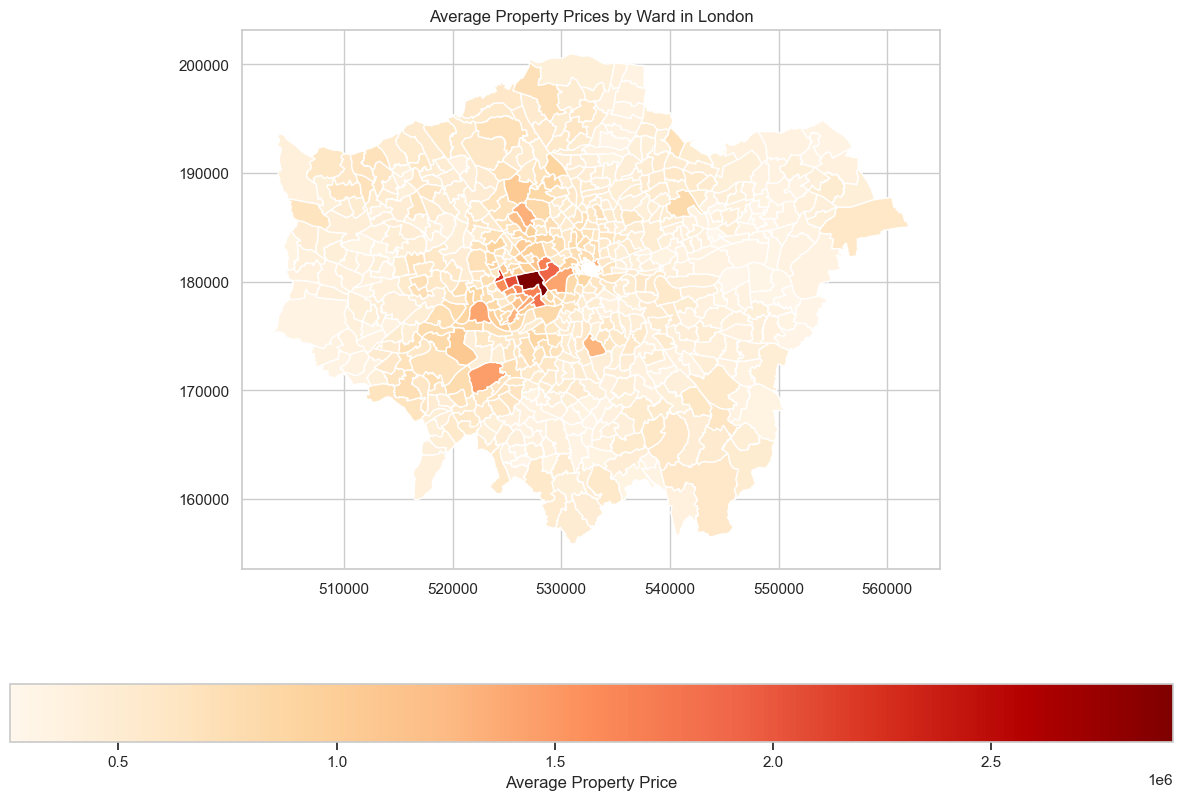

In [2496]:
# Plot the merged GeoDataFrame
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
merged_df.plot(column='Average_Price', ax=ax, legend=True, cmap='OrRd', legend_kwds={'label': "Average Property Price", 'orientation': "horizontal"})
ax.set_title('Average Property Prices by Ward in London')
plt.show()

In [2497]:
print(merged_df.columns)

Index(['NAME', 'GSS_CODE', 'DISTRICT', 'LAGSSCODE', 'HECTARES', 'NONLD_AREA',
       'geometry', 'WardCode', 'Average_Price'],
      dtype='object')


## Correlation

In [2498]:
# Load the dataset containing the housing number
housing_data_df = pd.read_csv('/Users/goffy/Desktop/QM/Individual Research/Dataset/ward-atlas-data.csv')

print("Housing Data DataFrame shape:", housing_data_df.shape)
housing_data_df.rename(columns={"Unnamed: 1": "WardCode"}, inplace=True)
print(housing_data_df)


Housing Data DataFrame shape: (629, 946)
    Unnamed: 0   WardCode            Unnamed: 2         Unnamed: 3  \
0        Codes   New Code               Borough              Names   
1         00AA  E09000001        City of London     City of London   
2       00ABFX  E05000026  Barking and Dagenham              Abbey   
3       00ABFY  E05000027  Barking and Dagenham             Alibon   
4       00ABFZ  E05000028  Barking and Dagenham          Becontree   
..         ...        ...                   ...                ...   
624     00BKGU  E05000648           Westminster         Westbourne   
625     00BKGW  E05000649           Westminster           West End   
626         #1  E12000007                   NaN             London   
627         #2  E92000001                   NaN            England   
628         #3  K04000001                   NaN  England and Wales   

     Population and Age; Population Estimates and Projections; 2001  \
0                                              

In [2499]:
# Merge housing_data_df with ward_fire_incident_counts on WardCode
merged_housing_fire_df = pd.merge(housing_data_df, merged_fire_incident_df, on='WardCode', how='inner')

print("Merged Housing and Fire Incident DataFrame shape:", merged_fire_incident_df)
print(merged_housing_fire_df)

print(merged_housing_fire_df.columns)

Merged Housing and Fire Incident DataFrame shape:                        NAME   GSS_CODE                               DISTRICT  \
0         Chessington South  E05000405                   Kingston upon Thames   
1    Tolworth and Hook Rise  E05000414                   Kingston upon Thames   
2                Berrylands  E05000401                   Kingston upon Thames   
3                 Alexandra  E05000400                   Kingston upon Thames   
4                  Beverley  E05000402                   Kingston upon Thames   
..                      ...        ...                                    ...   
652                 Aldgate  E05009289  City and County of the City of London   
653            Broad Street  E05009295  City and County of the City of London   
654          Coleman Street  E05009299  City and County of the City of London   
655               Portsoken  E05009308  City and County of the City of London   
656              Candlewick  E05009296  City and County of 

In [2500]:
# Filter the dataframe to only include rows where Fire_Incident_Count is greater than 1
filtered_housing_fire_df = merged_housing_fire_df[merged_housing_fire_df['Fire_Incident_Count'] > 6]

# Calculate the FireOccurrenceIndex
filtered_housing_fire_df['FireOccurrenceIndex'] = 1000 * filtered_housing_fire_df['Fire_Incident_Count'] / filtered_housing_fire_df['Area and Density; Population density (persons per sq km); 2018']

print(filtered_housing_fire_df[['WardCode', 'Fire_Incident_Count', 'Area and Density; Population density (persons per sq km); 2018', 'FireOccurrenceIndex']])



      WardCode  Fire_Incident_Count  \
19   E05000045                    7   
39   E05000086                    7   
55   E05000102                   15   
78   E05000125                    8   
82   E05000129                   30   
84   E05000131                    9   
91   E05000138                    7   
92   E05000139                    7   
94   E05000141                   19   
95   E05000142                    8   
96   E05000143                   12   
151  E05000222                   11   
154  E05000225                    7   
157  E05000228                    7   
160  E05000250                   10   
236  E05000326                   13   
241  E05000331                   11   
251  E05000341                    9   
268  E05000358                    7   
277  E05000367                   18   
285  E05000375                    8   
288  E05000378                    7   
300  E05000408                    7   
304  E05000412                    7   
308  E05000416           

/var/folders/wb/gskmj0qx18q4nbm5tq4v7hlc0000gn/T/ipykernel_72493/3219323805.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_housing_fire_df['FireOccurrenceIndex'] = 1000 * filtered_housing_fire_df['Fire_Incident_Count'] / filtered_housing_fire_df['Area and Density; Population density (persons per sq km); 2018']


In [2501]:
# Merge merged_housing_fire_df with merged_df on WardCode
final_merged_df = merged_df.merge(filtered_housing_fire_df[['WardCode', 'Fire_Incident_Count', 'Household Income; Median Modelled Household income (£); 2012/13', 'FireOccurrenceIndex', 'Fires; Deliberate Fires per 1,000 population; 2014']], on='WardCode', how='left')

print("Final Merged DataFrame shape:", final_merged_df.shape)
print(final_merged_df)

Final Merged DataFrame shape: (657, 13)
                       NAME   GSS_CODE                               DISTRICT  \
0         Chessington South  E05000405                   Kingston upon Thames   
1    Tolworth and Hook Rise  E05000414                   Kingston upon Thames   
2                Berrylands  E05000401                   Kingston upon Thames   
3                 Alexandra  E05000400                   Kingston upon Thames   
4                  Beverley  E05000402                   Kingston upon Thames   
..                      ...        ...                                    ...   
652                 Aldgate  E05009289  City and County of the City of London   
653            Broad Street  E05009295  City and County of the City of London   
654          Coleman Street  E05009299  City and County of the City of London   
655               Portsoken  E05009308  City and County of the City of London   
656              Candlewick  E05009296  City and County of the City o

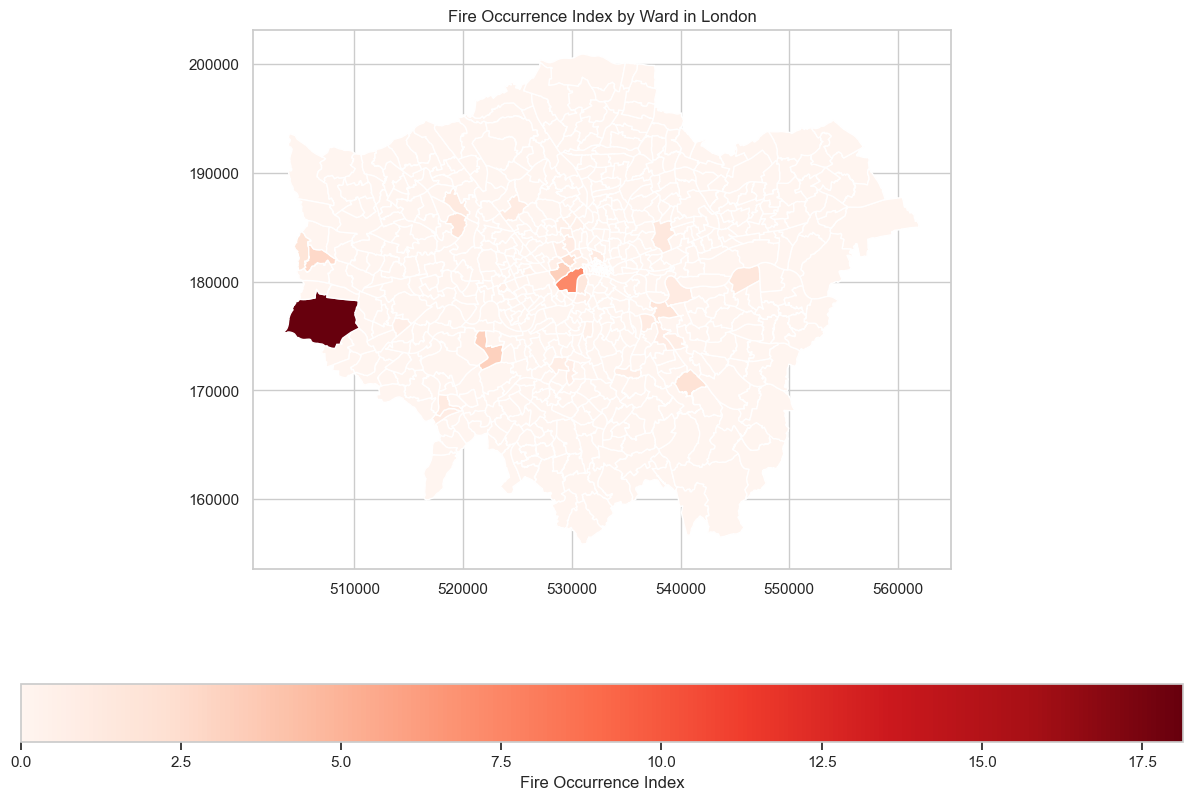

In [2502]:
# Merge the FireOccurrenceIndex with the london_wards_shp GeoDataFrame
merged_fire_occurrence_df = london_wards_shp.merge(filtered_housing_fire_df[['WardCode', 'FireOccurrenceIndex']], left_on='GSS_CODE', right_on='WardCode', how='left')

# Fill NaN values in FireOccurrenceIndex with 0
merged_fire_occurrence_df['FireOccurrenceIndex'] = merged_fire_occurrence_df['FireOccurrenceIndex'].fillna(0)

# Plot the merged GeoDataFrame
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
merged_fire_occurrence_df.plot(column='FireOccurrenceIndex', ax=ax, legend=True, cmap='Reds', legend_kwds={'label': "Fire Occurrence Index", 'orientation': "horizontal"})
ax.set_title('Fire Occurrence Index by Ward in London')
plt.show()

In [2524]:
# Sort the dataframe by FireOccurrenceIndex in descending order and select the top 10 wards
top_10_fire_occurrence_wards = final_merged_df.sort_values(by='FireOccurrenceIndex', ascending=False).head(10)

# Display the top 10 wards
print(top_10_fire_occurrence_wards[['WardCode', 'NAME', 'FireOccurrenceIndex', 'Average_Price']])

      WardCode                         NAME  FireOccurrenceIndex  \
127  E05000331            Heathrow Villages            18.140351   
481  E05000644                  St. James's             7.309237   
487  E05000649                     West End             3.290043   
427  E05000621  Roehampton and Putney Heath             3.250000   
132  E05000326                       Brunel             2.758842   
504  E05000129                   Bloomsbury             2.429150   
60   E05000125       Plaistow and Sundridge             2.000000   
185  E05000102                    Tokyngton             1.887640   
131  E05000341               Uxbridge South             1.794212   
280  E05000222               Greenwich West             1.720670   

     Average_Price  
127   3.323667e+05  
481   1.408819e+06  
487   1.911607e+06  
427   4.508333e+05  
132   4.115952e+05  
504   6.156518e+05  
60    4.216857e+05  
185   3.923436e+05  
131   3.519876e+05  
280   5.335119e+05  


In [2503]:
# Conduct correlation analysis
correlation = final_merged_df[['Average_Price', 'FireOccurrenceIndex']].corr()

print("Correlation between Average_Price and FireOccurrenceIndex:")
print(correlation)

Correlation between Average_Price and FireOccurrenceIndex:
                     Average_Price  FireOccurrenceIndex
Average_Price             1.000000             0.005012
FireOccurrenceIndex       0.005012             1.000000


In [2504]:
# Conduct correlation analysis between Average_Price and Fire_Incident_Count
correlation_price_count = final_merged_df[['Average_Price', 'Fire_Incident_Count']].corr()

print("Correlation between Average_Price and Fire_Incident_Count:")
print(correlation_price_count)

Correlation between Average_Price and Fire_Incident_Count:
                     Average_Price  Fire_Incident_Count
Average_Price             1.000000             0.335344
Fire_Incident_Count       0.335344             1.000000


## Regression

In [2505]:
print(final_merged_df.columns)

Index(['NAME', 'GSS_CODE', 'DISTRICT', 'LAGSSCODE', 'HECTARES', 'NONLD_AREA',
       'geometry', 'WardCode', 'Average_Price', 'Fire_Incident_Count',
       'Household Income; Median Modelled Household income (£); 2012/13',
       'FireOccurrenceIndex',
       'Fires; Deliberate Fires per 1,000 population; 2014'],
      dtype='object')


Regression Coefficients (Filtered): [[-1.66493379e-06]]
Intercept (Filtered): [2.07084934]
R-squared (Filtered): 0.15620259451515084


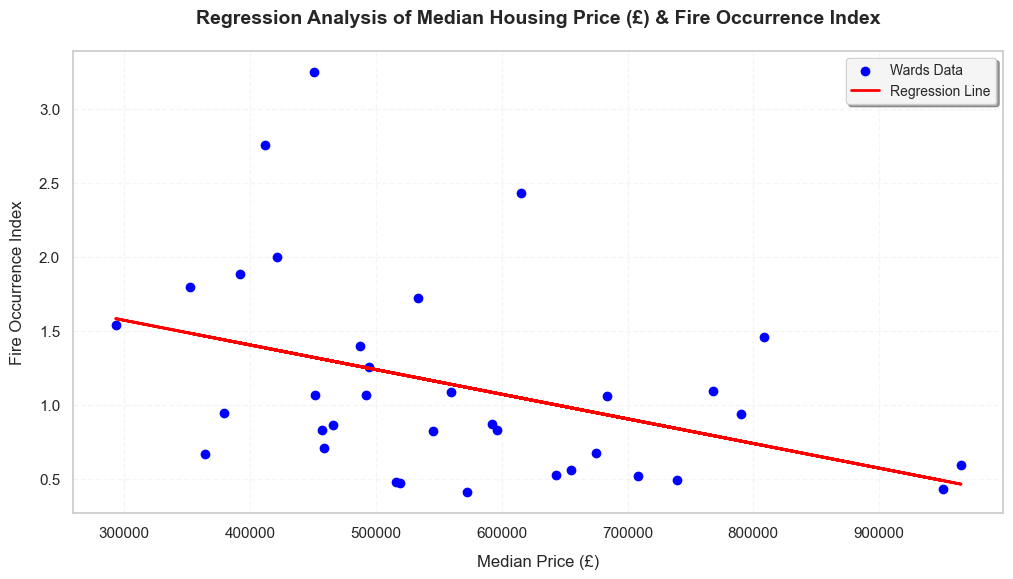

In [2543]:
# Define X and y
X = final_merged_df[['Average_Price']]
y = final_merged_df[['FireOccurrenceIndex']]

# Combine X and y into a single DataFrame for easier manipulation
data = pd.concat([X, y], axis=1)

# Drop rows with NaN values
data = data.dropna()

# Calculate the Z-scores for each column
z_scores = np.abs(stats.zscore(data))

# Define a threshold for identifying outliers
threshold = 1.96

# Filter out rows with Z-scores greater than the threshold
data_filtered = data[(z_scores < threshold).all(axis=1)]

# Separate the data back into X and y
X_filtered = data_filtered[['Average_Price']]
y_filtered = data_filtered[['FireOccurrenceIndex']]

# Re-run the regression analysis with the filtered data
regression_model_filtered = LinearRegression()
regression_model_filtered.fit(X_filtered, y_filtered)
y_pred_filtered = regression_model_filtered.predict(X_filtered)
r2_filtered = r2_score(y_filtered, y_pred_filtered)

print("Regression Coefficients (Filtered):", regression_model_filtered.coef_)
print("Intercept (Filtered):", regression_model_filtered.intercept_)
print("R-squared (Filtered):", r2_filtered)

# Plot the regression line with the filtered data
fig, ax = plt.subplots(1, 1, figsize=(12, 6))
ax.scatter(X_filtered, y_filtered, color='blue', label='Wards Data')
ax.plot(X_filtered, y_pred_filtered, color='red', linewidth=2, label='Regression Line')

# Add centered title
ax.set_title('Regression Analysis of Median Housing Price (£) & Fire Occurrence Index', fontsize=14, fontweight='bold', pad=20)

# Add x-label and y-label
ax.set_xlabel('Median Price (£)', fontsize=12, labelpad=10)
ax.set_ylabel('Fire Occurrence Index', fontsize=12, labelpad=10)

# Add grid
ax.grid(True, linestyle='--', alpha=0.2)

# Add legend
ax.legend(fontsize='10', loc='upper right', frameon=True, framealpha=0.9, fancybox=True, shadow=True)

plt.show()

In [2530]:

# Summary of the regression model
import statsmodels.api as sm

# Add a constant to the independent variable
X_filtered_const = sm.add_constant(X_filtered)

# Fit the regression model using statsmodels
model_filtered = sm.OLS(y_filtered, X_filtered_const).fit()

# Print the summary of the regression model
print(model_filtered.summary())

# Calculate the correlation between Average_Price and FireOccurrenceIndex in the filtered data
correlation_filtered = data_filtered[['Average_Price', 'FireOccurrenceIndex']].corr()

print("Correlation between Average_Price and FireOccurrenceIndex (Filtered):")
print(correlation_filtered)

                             OLS Regression Results                            
Dep. Variable:     FireOccurrenceIndex   R-squared:                       0.156
Model:                             OLS   Adj. R-squared:                  0.131
Method:                  Least Squares   F-statistic:                     6.109
Date:                 Mon, 13 Jan 2025   Prob (F-statistic):             0.0188
Time:                         20:04:08   Log-Likelihood:                -33.038
No. Observations:                   35   AIC:                             70.08
Df Residuals:                       33   BIC:                             73.19
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             2.0708      0.396 

In [2507]:
# Perform Pearson correlation test
pearson_corr, pearson_p_value = stats.pearsonr(data_filtered['Average_Price'], data_filtered['FireOccurrenceIndex'])

print("Pearson correlation coefficient (Filtered):", pearson_corr)
print("P-value of the Pearson correlation (Filtered):", pearson_p_value)

Pearson correlation coefficient (Filtered): -0.3952247392498993
P-value of the Pearson correlation (Filtered): 0.018781499396511022


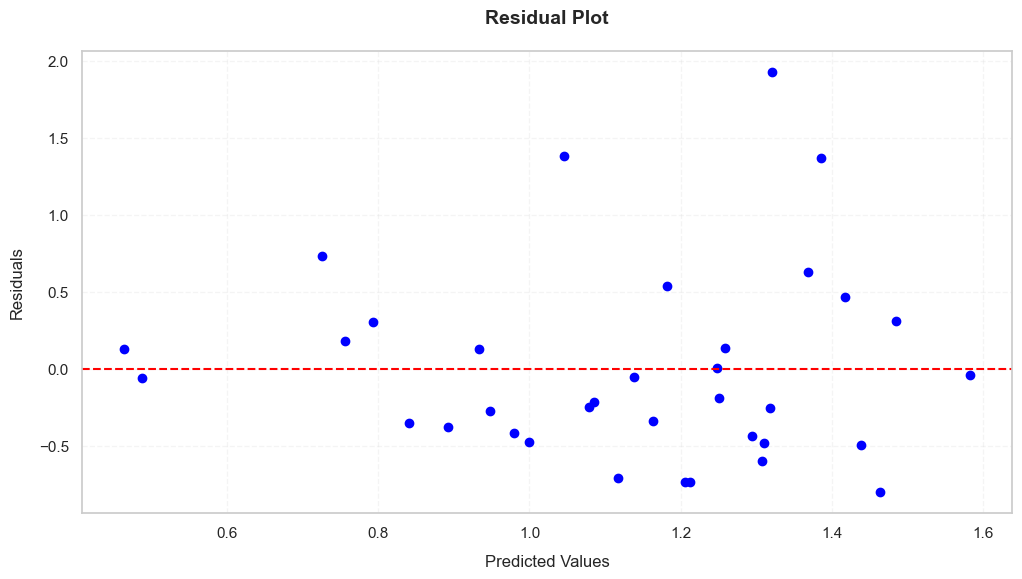

Shapiro-Wilk Test for Normality of Residuals:
Statistic: 0.8878861219228646, p-value: 0.0018979061273369593


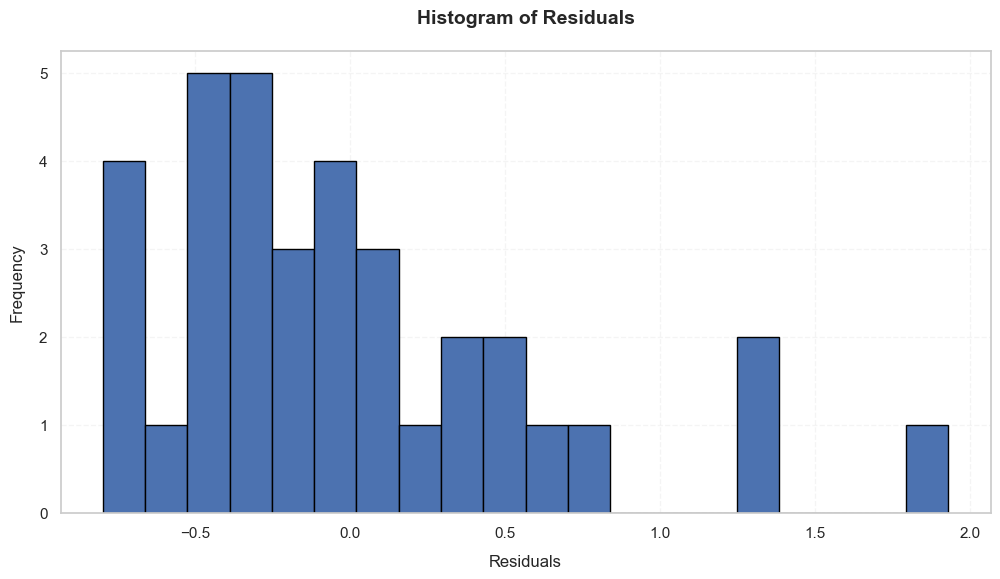

Breusch-Pagan Test for Homoscedasticity:
LM Statistic: 1.430614084100802, p-value: 0.2316642457881427


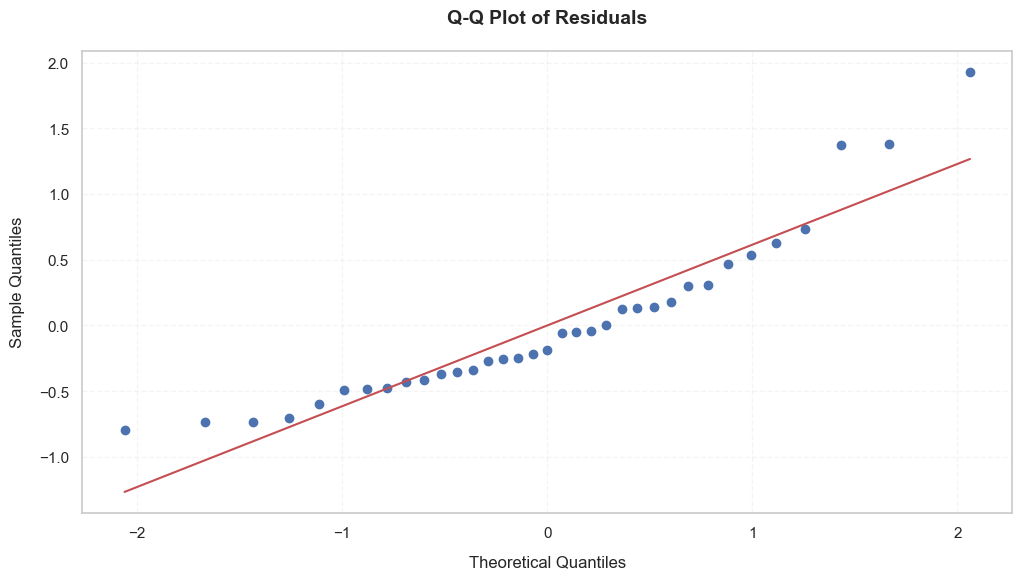

In [2541]:
import statsmodels.api as sm
import statsmodels.stats.diagnostic

# Calculate residuals
residuals = y_filtered - y_pred_filtered

# Plot residuals
fig, ax = plt.subplots(1, 1, figsize=(12, 6))
ax.scatter(y_pred_filtered, residuals, color='blue')
ax.axhline(y=0, color='red', linestyle='--')

# Add centered title
ax.set_title('Residual Plot', fontsize=14, fontweight='bold', pad=20)

# Add x-label and y-label
ax.set_xlabel('Predicted Values', fontsize=12, labelpad=10)
ax.set_ylabel('Residuals', fontsize=12, labelpad=10)

# Add grid
ax.grid(True, linestyle='--', alpha=0.2)

plt.show()

# Perform a normality test on residuals
shapiro_test = stats.shapiro(residuals)
print("Shapiro-Wilk Test for Normality of Residuals:")
print(f"Statistic: {shapiro_test.statistic}, p-value: {shapiro_test.pvalue}")

# Plot histogram of residuals
fig, ax = plt.subplots(1, 1, figsize=(12, 6))
ax.hist(residuals, bins=20, edgecolor='black')

# Add centered title
ax.set_title('Histogram of Residuals', fontsize=14, fontweight='bold', pad=20)

# Add x-label and y-label
ax.set_xlabel('Residuals', fontsize=12, labelpad=10)
ax.set_ylabel('Frequency', fontsize=12, labelpad=10)

# Add grid
ax.grid(True, linestyle='--', alpha=0.2)

plt.show()

# Check for homoscedasticity using Breusch-Pagan test
bp_test = statsmodels.stats.diagnostic.het_breuschpagan(residuals, sm.add_constant(X_filtered))
print("Breusch-Pagan Test for Homoscedasticity:")
print(f"LM Statistic: {bp_test[0]}, p-value: {bp_test[1]}")

# Q-Q plot for residuals
fig, ax = plt.subplots(1, 1, figsize=(12, 6))
stats.probplot(residuals.squeeze(), dist="norm", plot=ax)

# Add centered title
ax.set_title('Q-Q Plot of Residuals', fontsize=14, fontweight='bold', pad=20)

# Add x-label and y-label
ax.set_xlabel('Theoretical Quantiles', fontsize=12, labelpad=10)
ax.set_ylabel('Sample Quantiles', fontsize=12, labelpad=10)

# Add grid
ax.grid(True, linestyle='--', alpha=0.2)

plt.show()

London Wards Shapefile DataFrame shape: (8396, 12)


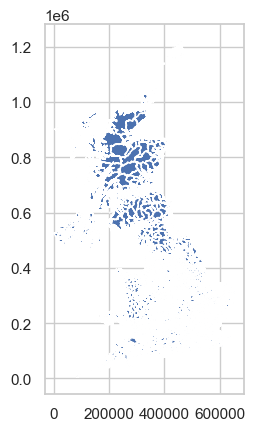

Index(['WD24CD', 'WD24NM', 'WD24NMW', 'LAD24CD', 'LAD24NM', 'LAD24NMW',
       'BNG_E', 'BNG_N', 'LONG', 'LAT', 'GlobalID', 'geometry'],
      dtype='object')
         WD24CD         WD24NM       WD24NMW    LAD24CD        LAD24NM  \
0     E05000932       Ainsdale          None  E08000014         Sefton   
1     E05000933       Birkdale          None  E08000014         Sefton   
2     E05000934  Blundellsands          None  E08000014         Sefton   
3     E05000935      Cambridge          None  E08000014         Sefton   
4     E05000936         Church          None  E08000014         Sefton   
...         ...            ...           ...        ...            ...   
8391  W05001796      St Arvans     Llanarfan  W06000021  Monmouthshire   
8392  W05001797   St Kingsmark  Llangynfarch  W06000021  Monmouthshire   
8393  W05001798           Town        Y Dref  W06000021  Monmouthshire   
8394  W05001799       West End      West End  W06000021  Monmouthshire   
8395  W05001800        Wyes

In [2509]:
import geopandas as gpd

# Load the shapefile
london_wards_shp = gpd.read_file('/Users/goffy/Desktop/Wards_December_2024_Boundaries_UK_BFC_5666400271288124116/WD_DEC_24_UK_BFC.shp')

print("London Wards Shapefile DataFrame shape:", london_wards_shp.shape)

london_wards_shp.plot()
plt.show()

print(london_wards_shp.columns)
print(london_wards_shp)
# Merge the ward_incident_counts with the london_wards_shp GeoDataFrame
merged_ward_incident_df = london_wards_shp.merge(ward_incident_counts, left_on='WD24CD', right_on='WardCode', how='right')

print(merged_ward_incident_df.head())

In [2510]:
rail_geo = gpd.read_file('https://raw.github.com/IflyNY2PR/FSDS_URL/refs/heads/main/London_rail/01_LondonRailNetwork.shp')
block_geo = gpd.read_file('https://raw.github.com/IflyNY2PR/FSDS_URL/refs/heads/main/London_street/01_LondonStreetNetwork.shp')
rail_geo = rail_geo.to_crs(epsg=4326)
block_geo = block_geo.to_crs(epsg=4326)

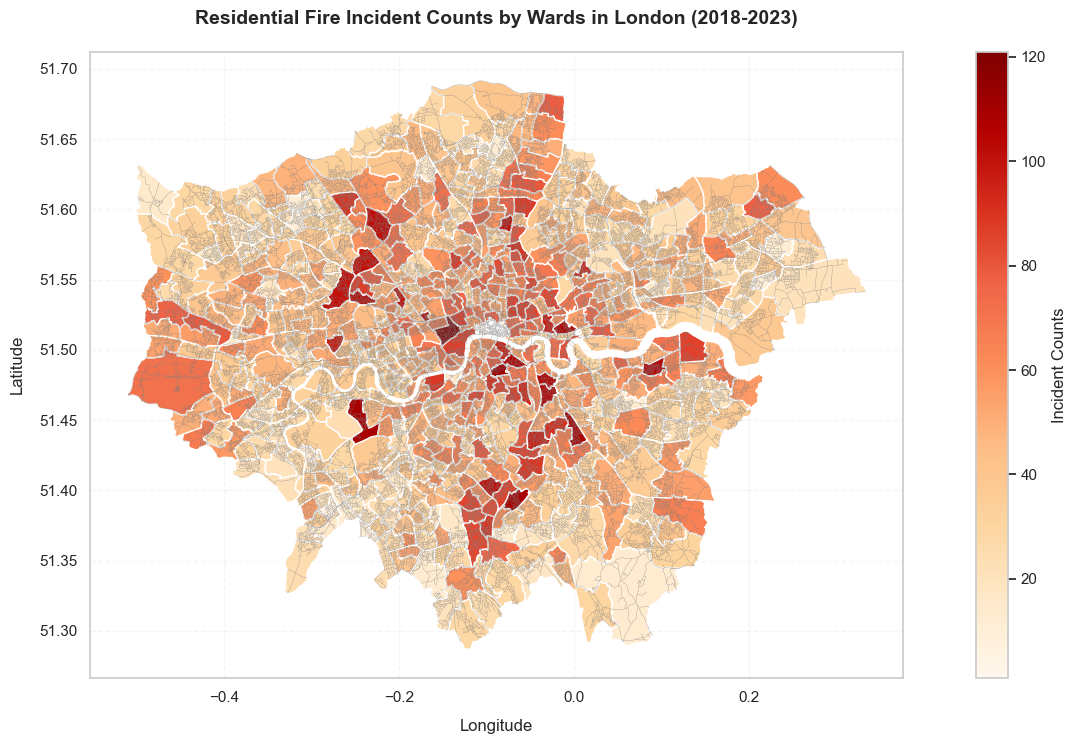

Rows with NaN values in 'WD24CD':
  WD24CD WD24NM WD24NMW LAD24CD LAD24NM LAD24NMW  BNG_E  BNG_N  LONG  LAT  \
0    NaN    NaN     NaN     NaN     NaN      NaN    NaN    NaN   NaN  NaN   

  GlobalID geometry   WardCode  Count  
0      NaN     None  E05000380      1  


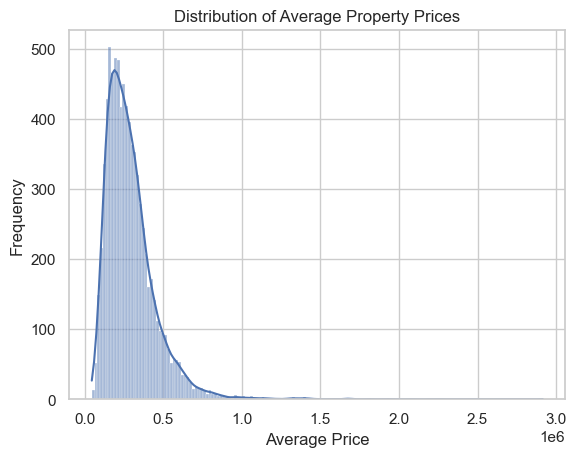

In [2511]:
merged_ward_incident_df = merged_ward_incident_df.to_crs(epsg=4326)

# Create figure with custom size and layout
fig, ax = plt.subplots(1, 1, figsize=(15, 8))

# Plot additional layers
block_geo.plot(ax=ax, color='grey', linewidth=0.2)

# Plot choropleth map
merged_ward_incident_df.plot(
    column='Count',
    ax=ax,
    cmap='OrRd',
    legend=True,
    legend_kwds={'label': "Incident Counts", 'orientation': "vertical"}
)


# Add centered title
ax.set_title('Residential Fire Incident Counts by Wards in London (2018-2023)', 
             fontsize=14, 
             fontweight='bold',
             pad=20)

# Add longitude and latitude labels
ax.set_xlabel('Longitude', fontsize=12, labelpad=10)
ax.set_ylabel('Latitude', fontsize=12, labelpad=10)

ax.grid(True, linestyle='--', alpha=0.2)

# Adjust layout to place color bar inside the map
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

# Find the rows with NaN values in the 'WD24CD' column
na_wd24cd = merged_ward_incident_df[merged_ward_incident_df['WD24CD'].isna()]

print("Rows with NaN values in 'WD24CD':")
print(na_wd24cd)

# Plot the distribution of Average_Price using seaborn
sns.histplot(med_price_df['Average_Price'], kde=True)
plt.title('Distribution of Average Property Prices')
plt.xlabel('Average Price')
plt.ylabel('Frequency')
plt.show()



In [2512]:
# Merge housing_data_df with merged_ward_incident_df on WardCode
merged_housing_incident_df = pd.merge(merged_df, merged_ward_incident_df, on='WardCode', how='inner')

print("Merged Housing and Incident DataFrame shape:", merged_housing_incident_df.shape)
print(merged_housing_incident_df)

Merged Housing and Incident DataFrame shape: (158, 22)
                  NAME   GSS_CODE                               DISTRICT  \
0        Coulsdon Town  E05011466                                Croydon   
1    Purley & Woodcote  E05011476                                Croydon   
2               Waddon  E05011487                                Croydon   
3         Old Coulsdon  E05011474                                Croydon   
4               Kenley  E05011469                                Croydon   
..                 ...        ...                                    ...   
153              Tower  E05009310  City and County of the City of London   
154        Bishopsgate  E05009292  City and County of the City of London   
155         Queenhithe  E05009309  City and County of the City of London   
156         Aldersgate  E05009288  City and County of the City of London   
157          Portsoken  E05009308  City and County of the City of London   

     LAGSSCODE  HECTARES  NONLD_

In [2513]:
# Load the population data
population_df = pd.read_csv('/Users/goffy/Desktop/Pop.csv')

# Display the shape and the first few rows of the population data
print("Population DataFrame shape:", population_df.shape)
print(population_df)

Population DataFrame shape: (7608, 187)
     LAD 2023 Code   LAD 2023 Name Ward 2023 Code   Ward 2023 Name  Total  F0  \
0        E06000001      Hartlepool      E05013038      Burn Valley  7,776  26   
1        E06000001      Hartlepool      E05013039         De Bruce  8,447  46   
2        E06000001      Hartlepool      E05013040  Fens & Greatham  6,402  16   
3        E06000001      Hartlepool      E05013041      Foggy Furze  8,225  43   
4        E06000001      Hartlepool      E05013042             Hart  7,656  43   
...            ...             ...            ...              ...    ...  ..   
7603     W06000024  Merthyr Tydfil      W05001622       Penydarren  5,232  33   
7604     W06000024  Merthyr Tydfil      W05001623         Plymouth  4,910  17   
7605     W06000024  Merthyr Tydfil      W05001624             Town  7,990  37   
7606     W06000024  Merthyr Tydfil      W05001625        Treharris  6,243  25   
7607     W06000024  Merthyr Tydfil      W05001626           Vaynor  3

/var/folders/wb/gskmj0qx18q4nbm5tq4v7hlc0000gn/T/ipykernel_72493/4204366932.py:2: DtypeWarning: Columns (27,28,29,118,119,120) have mixed types. Specify dtype option on import or set low_memory=False.
  population_df = pd.read_csv('/Users/goffy/Desktop/Pop.csv')


In [2514]:
# Merge the merged_housing_incident_df with population_df on the WardCode column
merged_housing_incident_population_df = pd.merge(merged_housing_incident_df, population_df, left_on='WardCode', right_on='Ward 2023 Code', how='inner')

print("Merged Housing, Incident, and Population DataFrame shape:", merged_housing_incident_population_df.shape)
print(merged_housing_incident_population_df.columns)

Merged Housing, Incident, and Population DataFrame shape: (157, 209)
Index(['NAME', 'GSS_CODE', 'DISTRICT', 'LAGSSCODE', 'HECTARES', 'NONLD_AREA',
       'geometry_x', 'WardCode', 'Average_Price', 'WD24CD',
       ...
       'M81', 'M82', 'M83', 'M84', 'M85', 'M86', 'M87', 'M88', 'M89', 'M90'],
      dtype='object', length=209)


In [2515]:
# Replace commas in the 'Total' column and convert to numeric
merged_housing_incident_population_df['Total'] = merged_housing_incident_population_df['Total'].str.replace(',', '').astype(float)

In [2516]:
# Calculate the FireIncidentIndex
merged_housing_incident_population_df['FireIncidentIndex'] = merged_housing_incident_population_df['Count'] / merged_housing_incident_population_df['Total']

# Display the updated DataFrame
print(merged_housing_incident_population_df[['WardCode', 'Count', 'Total', 'FireIncidentIndex']])

      WardCode  Count    Total  FireIncidentIndex
0    E05011466     21  15558.0           0.001350
1    E05011476     60  15594.0           0.003848
2    E05011487     84  18672.0           0.004499
3    E05011474     29  10034.0           0.002890
4    E05011469     25  11008.0           0.002271
..         ...    ...      ...                ...
152  E05009310      8    373.0           0.021448
153  E05009292      3    484.0           0.006198
154  E05009309      2    563.0           0.003552
155  E05009288      2   2242.0           0.000892
156  E05009308      6   1605.0           0.003738

[157 rows x 4 columns]


Regression Coefficients (Filtered): [[-1.57187771e-05]]
Intercept (Filtered): [62.92659715]
R-squared (Filtered): 0.049407506114820365


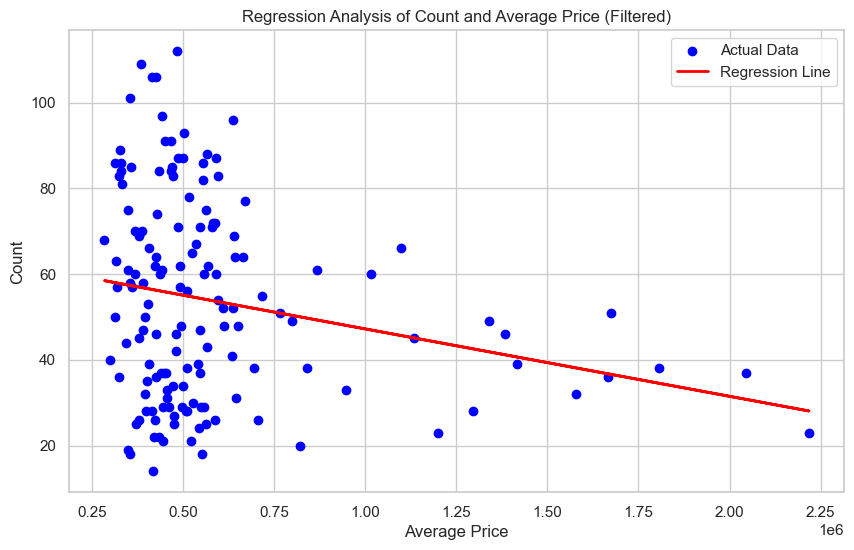

                            OLS Regression Results                            
Dep. Variable:                  Count   R-squared:                       0.049
Model:                            OLS   Adj. R-squared:                  0.043
Method:                 Least Squares   F-statistic:                     7.640
Date:                Mon, 13 Jan 2025   Prob (F-statistic):            0.00644
Time:                        19:54:06   Log-Likelihood:                -678.26
No. Observations:                 149   AIC:                             1361.
Df Residuals:                     147   BIC:                             1367.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            62.9266      3.819     16.478

In [2517]:
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

# Filter the rows where Count is greater than 6
filtered_data = merged_housing_incident_population_df[merged_housing_incident_population_df['Count'] > 12]

# Define X and y
X = filtered_data[['Average_Price']]
y = filtered_data[['Count']]

# Drop rows with NaN values
data = pd.concat([X, y], axis=1).dropna()

# Separate the data back into X and y
X_filtered = data[['Average_Price']]
y_filtered = data[['Count']]

# Perform the regression analysis with the filtered data
regression_model_filtered = LinearRegression()
regression_model_filtered.fit(X_filtered, y_filtered)
y_pred_filtered = regression_model_filtered.predict(X_filtered)
r2_filtered = r2_score(y_filtered, y_pred_filtered)

print("Regression Coefficients (Filtered):", regression_model_filtered.coef_)
print("Intercept (Filtered):", regression_model_filtered.intercept_)
print("R-squared (Filtered):", r2_filtered)

# Plot the regression line with the filtered data
plt.figure(figsize=(10, 6))
plt.scatter(X_filtered, y_filtered, color='blue', label='Actual Data')
plt.plot(X_filtered, y_pred_filtered, color='red', linewidth=2, label='Regression Line')
plt.xlabel('Average Price')
plt.ylabel('Count')
plt.title('Regression Analysis of Count and Average Price (Filtered)')
plt.legend()
plt.show()

# Summary of the regression model
import statsmodels.api as sm

# Add a constant to the independent variable
X_filtered_const = sm.add_constant(X_filtered)

# Fit the regression model using statsmodels
model_filtered = sm.OLS(y_filtered, X_filtered_const).fit()

# Print the summary of the regression model
print(model_filtered.summary())
